In [ ]:
from google.colab import files
upload = files.upload()

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/stemmed.csv')
df.drop(columns=['Unnamed: 0', 'negative', 'neutral', 'positive'], axis=1, inplace=True)
df

,tweet,label
0,mohon ulama lurus k mmbri hujjah partai diwlh ...,neutral
1,lokasi strategis jalan sumatera bandung nyaman...,positive
2,betapa bahagia unboxing paket barang bagus beli,positive
3,duh mahasiswa sombong kasih kartu kuning ajar ...,negative
4,makan agam harga makan food stall kasir suasan...,positive
...,...,...
10994,NaN,positive
10995,enak masakan kepiting senang pilih kepiting se...,positive
10996,NaN,neutral
10997,pagi pagi tol pasteur macet parah bikin jengkel,negative


In [ ]:
df['tweet'] = df['tweet'].astype(str)

In [ ]:
def cleaning(tweet):
  
  string = tweet.lower()
  string = re.sub(r'[^a-zA-Z]+', ' ', string)
  string = re.sub('0-9', ' ', string)
  
  return string
df['tweet'] = df['tweet'].apply(cleaning)

In [ ]:
!pip install sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
reader = df['tweet']
factory = StopWordRemoverFactory()
stopwords = factory.create_stop_word_remover()
df['tweet'] = df['tweet'].apply(stopwords.remove)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pd.Series(" ".join(reader).split()).value_counts(10)

makan       0.039546
enak        0.022538
harga       0.012308
bandung     0.010510
menu        0.010467
              ...   
negre       0.000006
coffie      0.000006
biawak      0.000006
urai        0.000006
foodlife    0.000006
Length: 12459, dtype: float64

In [ ]:
df.tweet.duplicated().sum()

236

In [ ]:
df['tweet'] = df.tweet.drop_duplicates()

In [ ]:
df.label.value_counts()

positive    6415
negative    3436
neutral     1148
Name: label, dtype: int64

In [ ]:
tweet = df.tweet.to_list()

In [ ]:
#import library model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#TFIDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(tweet)

X = tfidf_vectorizer.transform(tweet)
y = df['label']

In [ ]:
pickle.dump(tfidf_vectorizer, open('feature.p', 'wb'))

In [ ]:
X

<10999x12435 sparse matrix of type '<class 'numpy.float64'>'
	with 145160 stored elements in Compressed Sparse Row format>

In [ ]:
y

array(['neutral', 'positive', 'positive', ..., 'neutral', 'negative',
       'positive'], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

#Model NN SKLearn

In [ ]:
model = MLPClassifier()
model.fit(X_train, y_train)

MLPClassifier()

In [ ]:
pickle.dump(model, open('model.p', 'wb'))

In [ ]:
history = model.predict(X_test)
print(classification_report(y_test, history))

              precision    recall  f1-score   support

    negative       0.70      0.75      0.73       687
     neutral       0.69      0.66      0.68       230
    positive       0.88      0.85      0.86      1283

    accuracy                           0.80      2200
   macro avg       0.76      0.75      0.76      2200
weighted avg       0.80      0.80      0.80      2200



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


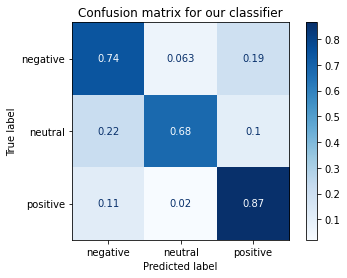

In [ ]:
# Generate confusion matrix
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show();

In [ ]:
#evaluasi
kf = KFold(n_splits=5, random_state=42, shuffle=True)
accuracies = []
y = y

for iteration, data in enumerate(kf.split(X), start=1):
  data_train = X[data[0]]
  target_train = y[data[0]]

  data_test = X[data[1]]
  target_test = y[data[1]]

  clf = MLPClassifier()
  clf.fit(data_train, target_train)

  preds = clf.predict(data_test)

  accuracy = accuracy_score(target_test, preds)

  print('training ke-', iteration)
  print(classification_report(target_test, preds))
  print('-------------------------------------------')

  accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)

print()
print()
print()
print('rata-rata akurasi:', average_accuracy)

training ke- 1
              precision    recall  f1-score   support

    negative       0.74      0.70      0.72       693
     neutral       0.65      0.66      0.66       213
    positive       0.85      0.87      0.86      1294

    accuracy                           0.80      2200
   macro avg       0.75      0.74      0.75      2200
weighted avg       0.80      0.80      0.80      2200

-------------------------------------------
training ke- 2
              precision    recall  f1-score   support

    negative       0.73      0.76      0.74       729
     neutral       0.73      0.59      0.65       247
    positive       0.85      0.87      0.86      1224

    accuracy                           0.80      2200
   macro avg       0.77      0.74      0.75      2200
weighted avg       0.80      0.80      0.80      2200

-------------------------------------------
training ke- 3
              precision    recall  f1-score   support

    negative       0.69      0.74      0.71       

In [ ]:
text = """
makanannya enak banget!!!
"""
teks = tfidf_vectorizer.transform([cleaning(text)])

result = model.predict(teks)[0]
print('sentiment', result)

sentiment positive


In [ ]:
text = '''
rasa ga enak!
'''
teks = tfidf_vectorizer.transform([cleaning(text)])

result = model.predict(teks)[0]
print('sentiment', result)

sentiment negative


In [ ]:
text = '''
saya mau makan
'''
teks = tfidf_vectorizer.transform([cleaning(text)])

result = model.predict(teks)[0]
print('sentiment', result)

sentiment neutral
